In [ ]:
    # =============================
    # Fraud Detection: DT vs SVM
    # =============================

    # --- Imports ---
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import normalize, StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import LinearSVC
    from sklearn.metrics import (
        roc_auc_score, roc_curve,
        precision_recall_curve, average_precision_score
    )
    from sklearn.utils.class_weight import compute_sample_weight
    import warnings
    warnings.filterwarnings('ignore')


In [68]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df=pd.read_csv(url)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


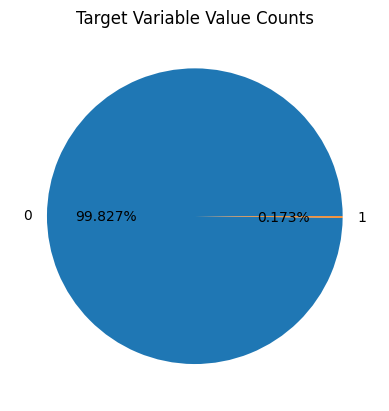

In [69]:

# --- Class Distribution ---
labels = df.Class.unique()
sizes = df.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

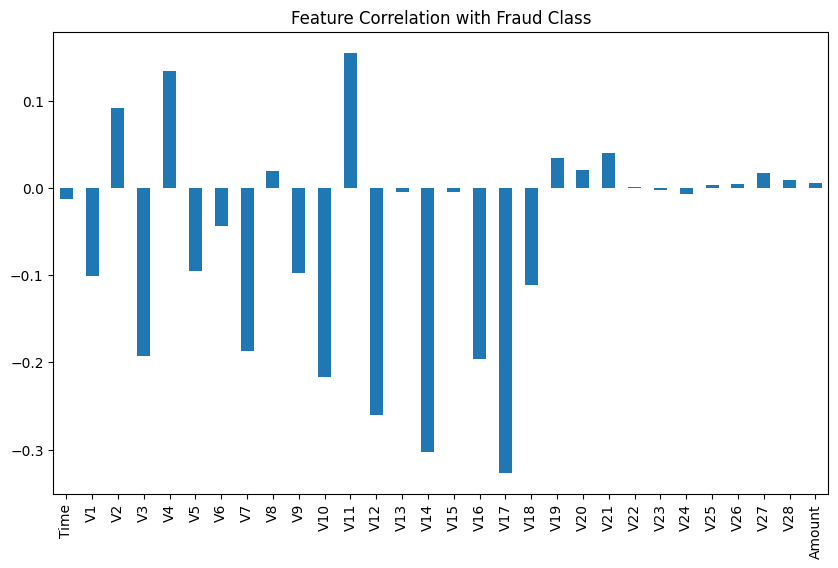

In [70]:
# --- Correlation with Target ---
correlation_values = df.corr()['Class'].drop('Class')
correlation_values.plot(kind='bar', figsize=(10, 6), title="Feature Correlation with Fraud Class")
plt.show()

In [71]:
# --- Standardize Features ---
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

In [72]:
# Separate Features & Labels
X_full = normalize(data_matrix[:, 1:30], norm="l1")
y = data_matrix[:, 30]

In [73]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.3, random_state=42
)
w_train = compute_sample_weight('balanced', y_train)

In [75]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train, sample_weight=w_train)
y_pred_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Decision Tree ROC-AUC (All Features):", round(roc_auc_dt, 3))

Decision Tree ROC-AUC (All Features): 0.939


In [76]:
# SVM
svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False)
svm.fit(X_train, y_train)
y_scores_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_scores_svm)
print("SVM ROC-AUC (All Features):", round(roc_auc_svm, 3))

SVM ROC-AUC (All Features): 0.986


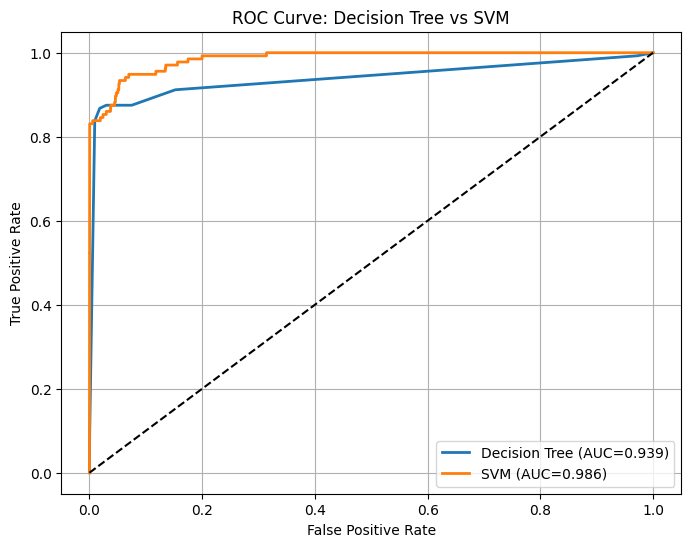

In [84]:
# --- ROC Curve Comparison ---
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_auc_dt:.3f})", linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_auc_svm:.3f})", linewidth=2)
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Decision Tree vs SVM")
plt.legend()
plt.grid(True)
plt.show()



